# The Adult Income DataSet
## Description
                Title of dataset: adult.csv
### Sources:
        * Original owners of database - US Census Bureau
        * Donor of database - Ronny Kohavi and Barry Becker
        * Date received - 05/19/96 
### Number of Instances
        * 48842 instances, mix of continuous and discrete (train=32561, test=16281)
        * 45222 if instances with unknown values are removed (train=30162, test=15060)
        * Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).
### Number of Attributes/Fearures/Columns
        * 6 continuous, 8 nominal attributes.  
### Attribute Information/Fearures/Columns
  * age: continuous.
  * workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
  * fnlwgt: continuous.
  * education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters,  
    1st-4th, 10th, Doctorate, 5th-6th, Preschool.
  * education-num: continuous.
  * marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-
      spouse.
  * occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, 
    Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
  * relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
  * race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
  * sex: Female, Male.
  * capital-gain: continuous.
  * capital-loss: continuous.
  * hours-per-week: continuous.
  * native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, 
    Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, 
    Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, 
    Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
  * income: >50K, <=50K 
### Missing Values:
    7.4% rows have missing values.

# 1. Load Data & Libraries.  

In [1]:
# Importing all required libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the Data-Set.

Adult = pd.read_csv("adult.csv")

In [3]:
# Head of Data-Set.

Adult.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [4]:
# Tail of Data-Set.

Adult.tail(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48832,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
48833,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
48834,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
48835,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
48836,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


# 2. Missing Values ???

In [5]:
#For Missing Values of Data-Set.

missing_val = ['?']
Adult = pd.read_csv('adult.csv' , na_values = missing_val)

In [6]:
#Infomations of Data-Set.

Adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          46043 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         46033 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     47985 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


## Find the pattern of missing values & remove them. 

In [7]:
Adult.isnull().any(axis = 0)

age                False
workclass           True
fnlwgt             False
education          False
educational-num    False
marital-status     False
occupation          True
relationship       False
race               False
gender             False
capital-gain       False
capital-loss       False
hours-per-week     False
native-country      True
income             False
dtype: bool

In [8]:
Adult.isnull().all(axis = 0)

age                False
workclass          False
fnlwgt             False
education          False
educational-num    False
marital-status     False
occupation         False
relationship       False
race               False
gender             False
capital-gain       False
capital-loss       False
hours-per-week     False
native-country     False
income             False
dtype: bool

In [9]:
Adult.isnull().any(axis = 0).sum()

3

In [10]:
Adult.isnull().all(axis = 0).sum()

0

In [11]:
# Percentage of missing values.

round(100*(Adult.isnull().sum()/len(Adult.index)), 2)

age                0.00
workclass          5.73
fnlwgt             0.00
education          0.00
educational-num    0.00
marital-status     0.00
occupation         5.75
relationship       0.00
race               0.00
gender             0.00
capital-gain       0.00
capital-loss       0.00
hours-per-week     0.00
native-country     1.75
income             0.00
dtype: float64

In [12]:
Adult.dropna(subset = ['workclass','occupation','native-country'], axis = 0, inplace = True)
round(100*(Adult.isnull().sum()/len(Adult.index)), 2)

age                0.0
workclass          0.0
fnlwgt             0.0
education          0.0
educational-num    0.0
marital-status     0.0
occupation         0.0
relationship       0.0
race               0.0
gender             0.0
capital-gain       0.0
capital-loss       0.0
hours-per-week     0.0
native-country     0.0
income             0.0
dtype: float64

In [13]:
Adult.drop('fnlwgt', axis=1, inplace=True)
round(100*(Adult.isnull().sum()/len(Adult.index)), 2)

age                0.0
workclass          0.0
education          0.0
educational-num    0.0
marital-status     0.0
occupation         0.0
relationship       0.0
race               0.0
gender             0.0
capital-gain       0.0
capital-loss       0.0
hours-per-week     0.0
native-country     0.0
income             0.0
dtype: float64

In [14]:
# Shape of Data-Set after removing all unnecessary Rows & Columns.

Adult.shape

(45222, 14)

In [15]:
# Percentage of rows ,Which are removed in Data-Cleaning.

print(' Percentage = ',(48842 - len(Adult.index)) * 100 / 48842)

 Percentage =  7.411653904426518


# 3. Data Preparation.

In [16]:
# Gitting all the Numerical columns from Data-Set.

numerical = Adult.select_dtypes(include=['int64', 'float64'])

numerical.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week
0,25,7,0,0,40
1,38,9,0,0,50
2,28,12,0,0,40
3,44,10,7688,0,40
5,34,6,0,0,30


In [17]:
# Gitting all the Categorical columns from Data-Set.

categorical = Adult.select_dtypes(include=['object'])

categorical.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
5,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K


In [18]:
# Standardizing Numerical Datas / scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Adult_num = pd.DataFrame(scaler.fit_transform(numerical), columns = numerical.columns)

Adult_num.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week
0,-1.024983,-1.221559,-0.146733,-0.21878,-0.078120
1,-0.041455,-0.438122,-0.146733,-0.21878,0.754701
2,-0.798015,0.737034,-0.146733,-0.21878,-0.078120
3,0.412481,-0.046403,0.877467,-0.21878,-0.078120
4,-0.344079,-1.613277,-0.146733,-0.21878,-0.910942


In [19]:
# Encoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)
Adult_cat = pd.DataFrame(encoder.fit_transform(categorical), columns=encoder.get_feature_names(categorical.columns))
Adult_cat.head()

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [20]:
Adult = pd.concat([Adult_num, Adult_cat], axis=1)
Adult.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,-1.024983,-1.221559,-0.146733,-0.21878,-0.078120,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.041455,-0.438122,-0.146733,-0.21878,0.754701,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.798015,0.737034,-0.146733,-0.21878,-0.078120,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.412481,-0.046403,0.877467,-0.21878,-0.078120,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-0.344079,-1.613277,-0.146733,-0.21878,-0.910942,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [21]:
y = Adult.pop('income_>50K')
x = Adult

In [22]:
# split into train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6, random_state=100)

In [23]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(27133, 95) (27133,)
(18089, 95) (18089,)


# 4. Training Model.

In [24]:
# Building the first model with all the features

from sklearn.linear_model import LogisticRegression

clf_logit = LogisticRegression()
clf_logit.fit(x_train, y_train)

C:\Users\hp\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# 5. Testing Model.

In [25]:
x_test.head(10)

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
40273,-1.176295,-0.046403,-0.146733,-0.218780,-0.910942,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1984,1.093385,-0.046403,-0.146733,-0.218780,-0.078120,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1230,1.396009,-2.396715,0.266650,-0.218780,-0.078120,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25507,-0.571047,-2.396715,-0.146733,-0.218780,2.420344,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
553,0.866417,-0.046403,-0.146733,-0.218780,1.171112,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12381,-0.268423,-0.438122,-0.146733,-0.218780,1.587523,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10681,-0.041455,-1.221559,-0.146733,-0.218780,1.587523,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6918,-0.419735,-0.438122,-0.146733,-0.218780,-0.078120,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
35200,-0.949327,-1.613277,-0.146733,-0.218780,1.171112,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
21591,1.244697,1.128753,-0.146733,5.744895,0.754701,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [26]:
y_test_predict = clf_logit.predict(x_test)

# 6. Model - Evaluation. 

In [27]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_predict)

0.8500193487754989

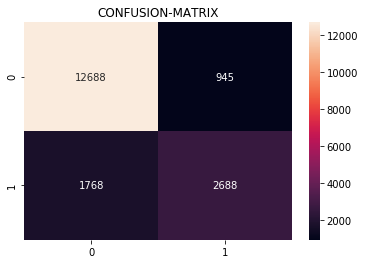

In [28]:
sns.heatmap(metrics.confusion_matrix(y_test, y_test_predict), annot = True, fmt='d')
plt.title("CONFUSION-MATRIX")
plt.show()

In [29]:
print(metrics.classification_report(y_test, y_test_predict))

# Number of features = 95

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90     13633
         1.0       0.74      0.60      0.66      4456

    accuracy                           0.85     18089
   macro avg       0.81      0.77      0.78     18089
weighted avg       0.84      0.85      0.84     18089



In [30]:
prob = clf_logit.predict_proba(x_test)
prob = prob[:,1]
roc_auc = metrics.roc_auc_score(y_test, prob)
print(roc_auc)

0.9058812140148369


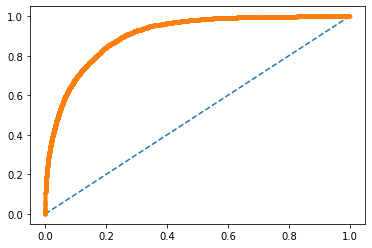

In [31]:
# ploting roc curve

fpr, tpr, thresholds = metrics.roc_curve(y_test, prob)

plt.plot([0, 1], [0, 1], linestyle='--')

# Plot the roc curve for the model

plt.plot(fpr, tpr, marker='.')
plt.show()

# 7. RFE

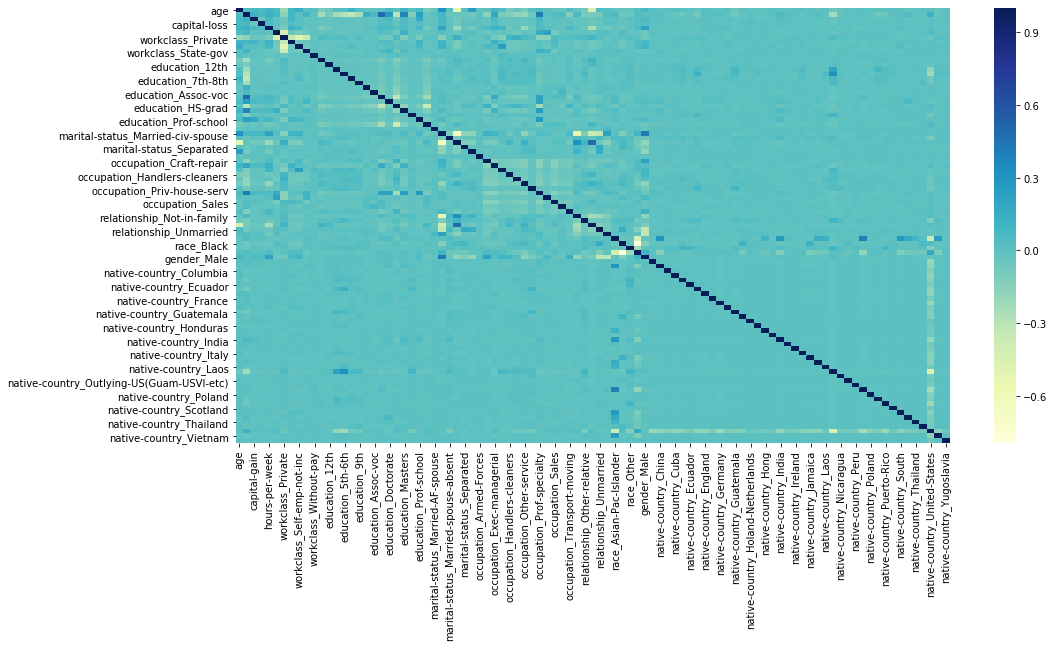

In [32]:
plt.figure(figsize=(16,8))
sns.heatmap(x_train.corr(), cmap="YlGnBu")

In [33]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

clf_logit_rfe = LogisticRegression()

rfe = RFE(clf_logit_rfe)
rfe = rfe.fit(x_train, y_train)

C:\Users\hp\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logisti

C:\Users\hp\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logisti

In [34]:

temp_Adult = pd.DataFrame({'Columns' : x_train.columns, 'Included' : rfe.support_, 'Ranking' : rfe.ranking_})

temp_Adult.loc[temp_Adult.Included == True, :]

,Columns,Included,Ranking
1,educational-num,True,1
2,capital-gain,True,1
8,workclass_Self-emp-not-inc,True,1
9,workclass_State-gov,True,1
10,workclass_Without-pay,True,1
13,education_1st-4th,True,1
14,education_5th-6th,True,1
17,education_Assoc-acdm,True,1
26,marital-status_Married-AF-spouse,True,1
27,marital-status_Married-civ-spouse,True,1


In [35]:
x_train_cols = list(x_train.columns[rfe.support_])

In [36]:
len(x_train_cols)

47

In [37]:
x_train_rfe = x_train[x_train_cols]
x_train_rfe.shape

(27133, 47)

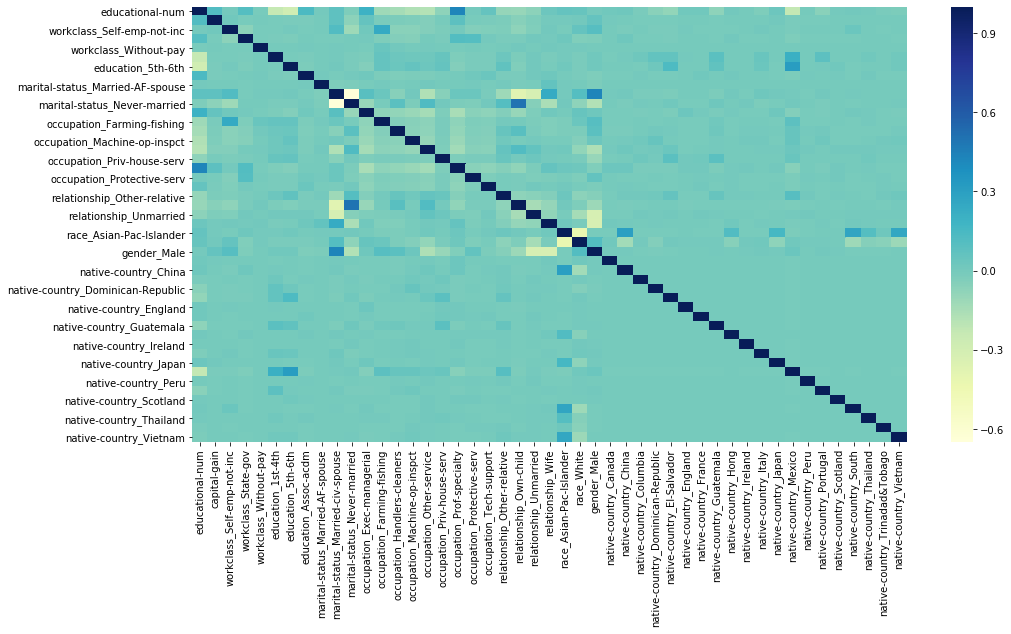

In [38]:
plt.figure(figsize=(16, 8))
sns.heatmap(x_train_rfe.corr(), cmap="YlGnBu")

In [39]:
clf_logit_rfe.fit(x_train_rfe, y_train)

C:\Users\hp\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
x_test_rfe = x_test[x_train_cols]

In [41]:
y_test_pred_rfe = clf_logit_rfe.predict(x_test_rfe)

In [42]:
metrics.accuracy_score(y_test, y_test_pred_rfe)

0.8432749184587318

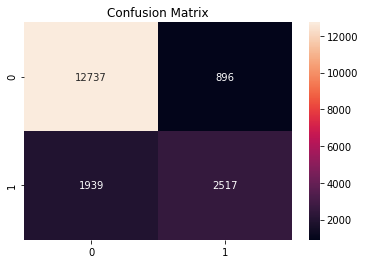

In [43]:
sns.heatmap(metrics.confusion_matrix(y_test, y_test_pred_rfe), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [44]:
print(metrics.classification_report(y_test, y_test_pred_rfe))

              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90     13633
         1.0       0.74      0.56      0.64      4456

    accuracy                           0.84     18089
   macro avg       0.80      0.75      0.77     18089
weighted avg       0.84      0.84      0.84     18089



In [45]:
prob_rfe = clf_logit_rfe.predict_proba(x_test_rfe)
prob_rfe = prob_rfe[:, 1]
roc_auc_rfe = metrics.roc_auc_score(y_test, prob_rfe)
print(roc_auc_rfe)

0.8946596803273712


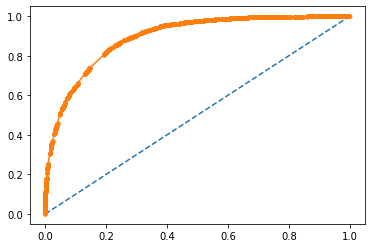

In [46]:
# ploting roc curve
fpr_rfe, tpr_rfe, thresholds_rfe = metrics.roc_curve(y_test, prob_rfe)

plt.plot([0, 1], [0, 1], linestyle='--')

# Plot the roc curve for the model
plt.plot(fpr_rfe, tpr_rfe, marker='.')
plt.show()

# 8. PCA

In [47]:
x_train.head(10)

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
34400,0.336825,-0.438122,-0.146733,-0.21878,-0.078120,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25805,-1.251951,-0.046403,-0.146733,-0.21878,-0.078120,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
28545,1.093385,-0.438122,-0.146733,-0.21878,-2.576584,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12181,1.244697,1.520471,-0.146733,-0.21878,-0.078120,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12491,-0.571047,-0.438122,-0.146733,-0.21878,-0.078120,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
35609,0.412481,1.128753,-0.146733,-0.21878,0.754701,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
24967,-0.495391,-0.438122,-0.146733,-0.21878,-0.078120,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
24510,-0.344079,1.128753,-0.146733,-0.21878,-1.743763,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24450,-0.722359,-0.438122,-0.146733,-0.21878,-0.078120,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15334,2.001257,-0.438122,-0.146733,-0.21878,-2.076892,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [48]:
x_train.shape

(27133, 95)

In [49]:
from sklearn.decomposition import PCA
pca = PCA(random_state = 0)

In [50]:
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=0,
    svd_solver='auto', tol=0.0, whiten=False)

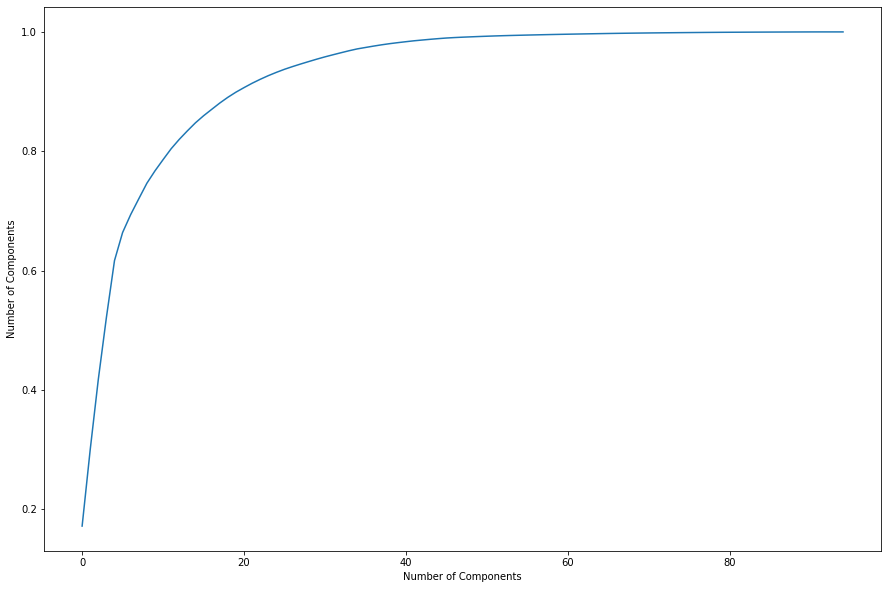

In [51]:
plt.figure(figsize = (15, 10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Number of Components')
plt.show()

In [52]:
np.cumsum(pca.explained_variance_ratio_)

array([0.17189434, 0.30008361, 0.41774551, 0.52152309, 0.61684283,
       0.66380467, 0.69391055, 0.72036232, 0.7464085 , 0.76714291,
       0.78593455, 0.80425615, 0.81991265, 0.83413146, 0.8476601 ,
       0.85943974, 0.87013773, 0.8807461 , 0.89038846, 0.89901319,
       0.90664303, 0.91395439, 0.920563  , 0.92669246, 0.9322289 ,
       0.93736008, 0.94192781, 0.9462215 , 0.9503443 , 0.95438157,
       0.95818512, 0.9617281 , 0.96515863, 0.96852072, 0.97156163,
       0.97389809, 0.97621245, 0.97837676, 0.98031045, 0.98199716,
       0.98359094, 0.98511552, 0.98636812, 0.98760442, 0.98873834,
       0.98975377, 0.99052328, 0.99116504, 0.99172196, 0.99226947,
       0.99276372, 0.99324584, 0.99367006, 0.9940406 , 0.99437692,
       0.99471057, 0.99501854, 0.99532497, 0.99562207, 0.995886  ,
       0.99614942, 0.99640155, 0.99665043, 0.99689365, 0.99713297,
       0.99735659, 0.9975618 , 0.99774548, 0.99792199, 0.9980924 ,
       0.99824849, 0.99839389, 0.9985314 , 0.9986652 , 0.99879

In [53]:
from sklearn.decomposition import PCA

pca_final = PCA(n_components = 20, random_state = 0)
x_train_pca = pca_final.fit_transform(x_train)

In [54]:
x_train_pca.shape

(27133, 20)

In [55]:
corrmat = np.corrcoef(x_train_pca.T)

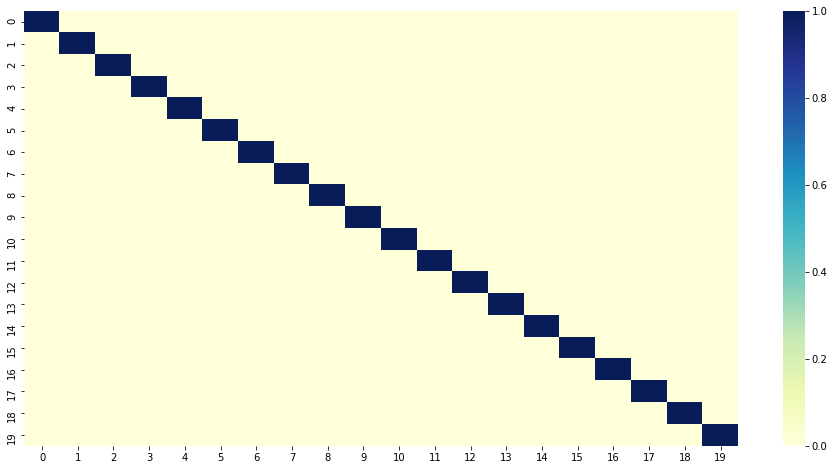

In [56]:
plt.figure(figsize=(16, 8))
sns.heatmap(corrmat, cmap="YlGnBu")

In [57]:
x_test.head(10)

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
40273,-1.176295,-0.046403,-0.146733,-0.218780,-0.910942,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1984,1.093385,-0.046403,-0.146733,-0.218780,-0.078120,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1230,1.396009,-2.396715,0.266650,-0.218780,-0.078120,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25507,-0.571047,-2.396715,-0.146733,-0.218780,2.420344,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
553,0.866417,-0.046403,-0.146733,-0.218780,1.171112,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12381,-0.268423,-0.438122,-0.146733,-0.218780,1.587523,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10681,-0.041455,-1.221559,-0.146733,-0.218780,1.587523,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6918,-0.419735,-0.438122,-0.146733,-0.218780,-0.078120,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
35200,-0.949327,-1.613277,-0.146733,-0.218780,1.171112,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
21591,1.244697,1.128753,-0.146733,5.744895,0.754701,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [58]:
x_test_pca = pca_final.transform(x_test) 

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [60]:
clf_logit_pca = LogisticRegression()
clf_knn_pca = KNeighborsClassifier()
clf_tree_pca = DecisionTreeClassifier()
clf_svm_pca = SVC(probability = True)

In [61]:
classifiers = ['LogisticRegression','KNeighborsClassifier', 'DecisionTreeClassifier', 'SVC']

In [62]:
models = {clf_logit_pca: 'LogisticRegression', clf_knn_pca: 'KNeighborsClassifier', clf_tree_pca: 'DecisionTreeClassifier', clf_svm_pca: 'SVC'}

In [63]:
def train(algo, name, x_train_pca, y_train, x_test_pca, y_test):
    algo.fit(x_train_pca, y_train)
    y_test_pred_pca = algo.predict(x_test_pca)
    return y_test_pred_pca


def performance(algo, name, x_test, y_test, y_test_pred_pca):
    
    # Accuracy Score
    
    score = metrics.accuracy_score(y_test, y_test_pred_pca)
    print('Accuracy score for', name, ':', score)
    
    # Confusion Metrics
    
    sns.heatmap(metrics.confusion_matrix(y_test, y_test_pred_pca), annot=True, fmt='d')
    plt.title("Confusion Matrix")
    plt.show()
    
    # Classification Report
    
    print(metrics.classification_report(y_test, y_test_pred_pca))
    
    # ROC AUC Score
    
    prob_pca = algo.predict_proba(x_test_pca)
    prob_pca = prob_pca[:, 1]
    roc_auc_pca = metrics.roc_auc_score(y_test, prob_pca)
    print(roc_auc_pca)
    
    # Plotting ROC Curve
    
    fpr_pca, tpr_pca, thresholds_pca = metrics.roc_curve(y_test, prob_pca)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr_pca, tpr_pca, marker='.')
    plt.show()
    
    return roc_auc_pca


def main(models):
    auc = []
    for algo, name in models.items():
        print('*'*30, name, '*'*30)
        y_test_pred_pca = train(algo, name, x_train_pca, y_train, x_test_pca, y_test)
        roc_auc_pca = performance(algo, name, x_test, y_test, y_test_pred_pca)
        auc.append(roc_auc_pca)
    return auc

****************************** LogisticRegression ******************************
Accuracy score for LogisticRegression : 0.8463707225385594


C:\Users\hp\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


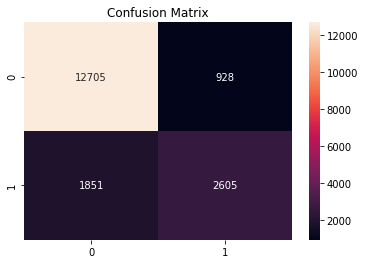

              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90     13633
         1.0       0.74      0.58      0.65      4456

    accuracy                           0.85     18089
   macro avg       0.81      0.76      0.78     18089
weighted avg       0.84      0.85      0.84     18089

0.9003924663475639


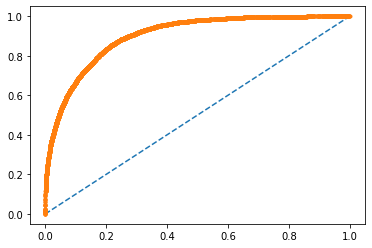

****************************** KNeighborsClassifier ******************************
Accuracy score for KNeighborsClassifier : 0.8289015423738183


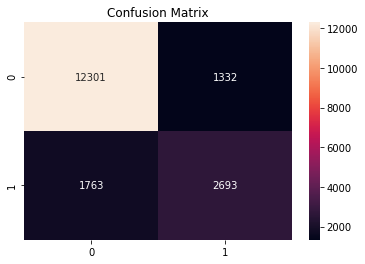

              precision    recall  f1-score   support

         0.0       0.87      0.90      0.89     13633
         1.0       0.67      0.60      0.64      4456

    accuracy                           0.83     18089
   macro avg       0.77      0.75      0.76     18089
weighted avg       0.82      0.83      0.83     18089

0.8611035919680057


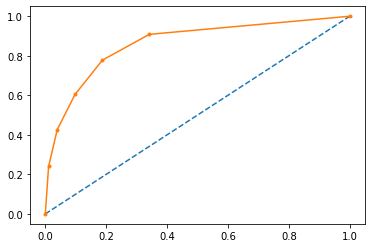

****************************** DecisionTreeClassifier ******************************
Accuracy score for DecisionTreeClassifier : 0.8075073248935817


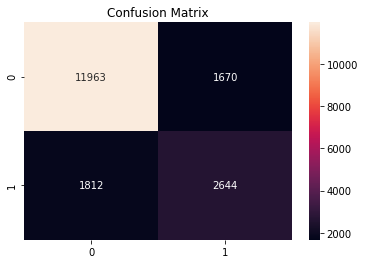

              precision    recall  f1-score   support

         0.0       0.87      0.88      0.87     13633
         1.0       0.61      0.59      0.60      4456

    accuracy                           0.81     18089
   macro avg       0.74      0.74      0.74     18089
weighted avg       0.81      0.81      0.81     18089

0.7544225346381371


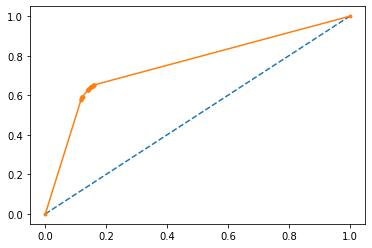

****************************** SVC ******************************


C:\Users\hp\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy score for SVC : 0.848416164519874


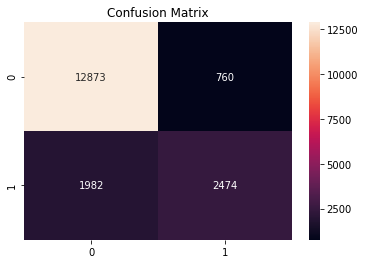

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90     13633
         1.0       0.76      0.56      0.64      4456

    accuracy                           0.85     18089
   macro avg       0.82      0.75      0.77     18089
weighted avg       0.84      0.85      0.84     18089

0.898495922082085


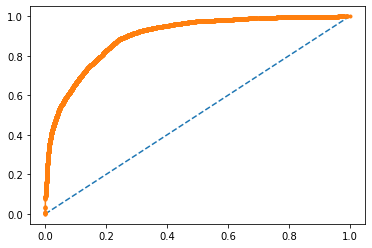

In [64]:
auc = main(models)

In [65]:
model_comp_df = pd.DataFrame(auc, columns = ['ROC AUC'], index = classifiers)

model_comp_df

,ROC AUC
LogisticRegression,0.900392
KNeighborsClassifier,0.861104
DecisionTreeClassifier,0.754423
SVC,0.898496
